# Movie reviews sentiment analysis

## Libraries import

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

## Data exploration

In [22]:
df = pd.read_csv('moviereviews.tsv', sep='\t')
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [23]:
df['label'].value_counts()

pos    1000
neg    1000
Name: label, dtype: int64

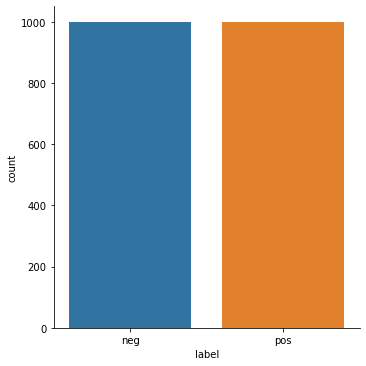

In [24]:
sns.catplot(x="label", kind="count", data=df)

We have a perfectly balanced dataset.

## Data cleaning

In [25]:
# check for missing values
df.isna().sum()

label      0
review    35
dtype: int64

In [26]:
# remove NaN values
df.dropna(inplace=True)
df.isna().sum()

label     0
review    0
dtype: int64

In [27]:
# check for empty strings
blanks = []  # start with an empty list
for i,lb,rv in df.itertuples():  # iterate over the DataFrame
    if type(rv)==str:            # avoid NaN values
        if rv.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list
sum(blanks)

23119

In [28]:
# remove the empty strings
df.drop(blanks, inplace=True)
blanks = []  # start with an empty list
for i,lb,rv in df.itertuples():  # iterate over the DataFrame
    if type(rv)==str:            # avoid NaN values
        if rv.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list
sum(blanks)

0

In [29]:
df['label'].value_counts()

pos    969
neg    969
Name: label, dtype: int64

The dataset is still balanced, so its good. 

## Sentiment analysis using VADER

In [31]:
sid = SentimentIntensityAnalyzer()
df['scores'] = df['review'].apply(lambda review: sid.polarity_scores(review))
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
df.head()

,label,review,scores,compound,comp_score
0,neg,how do films like mouse hunt get into theatres...,"{'neg': 0.121, 'neu': 0.778, 'pos': 0.101, 'co...",-0.9125,neg
1,neg,some talented actresses are blessed with a dem...,"{'neg': 0.12, 'neu': 0.775, 'pos': 0.105, 'com...",-0.8618,neg
2,pos,this has been an extraordinary year for austra...,"{'neg': 0.068, 'neu': 0.781, 'pos': 0.15, 'com...",0.9951,pos
3,pos,according to hollywood movies made in last few...,"{'neg': 0.071, 'neu': 0.782, 'pos': 0.147, 'co...",0.9972,pos
4,neg,my first press screening of 1998 and already i...,"{'neg': 0.091, 'neu': 0.817, 'pos': 0.093, 'co...",-0.2484,neg


In [32]:
accuracy_score(df['label'],df['comp_score'])

0.6357069143446853

In [33]:
print(classification_report(df['label'],df['comp_score']))

              precision    recall  f1-score   support

         neg       0.72      0.44      0.55       969
         pos       0.60      0.83      0.70       969

    accuracy                           0.64      1938
   macro avg       0.66      0.64      0.62      1938
weighted avg       0.66      0.64      0.62      1938



In [34]:
print(confusion_matrix(df['label'],df['comp_score']))

[[427 542]
 [164 805]]


So, it looks like VADER couldn't judge the movie reviews very accurately. This demonstrates one of the biggest challenges in sentiment analysis - understanding human semantics. Many of the reviews had positive things to say about a movie, reserving final judgement to the last sentence.